The purpose of this notebook is to analyze any relationship between the color of the cover of a book and other information about the book, particularly genre and year of publication.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import keras
import json

In [3]:
clf = keras.models.load_model('color-classifier/')

2023-06-02 12:01:32.002667: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
library = pd.read_csv('library_w_rgb.csv', index_col=0)

In [5]:
library.head()

,title,first_published,authors,cover_img_url,languages_available,subgenre,genre,cover_color
0,The Stones of Venice,1851.0,['John Ruskin'],archive.org/services/img/stonesofvenice01ruskiala,2.0,Architecture,Arts,"(9, 12, 19)"
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],archive.org/services/img/architetturamedi01arat,7.0,Architecture,Arts,"(55, 52, 44)"
2,The Alhambra,1800.0,['Washington Irving'],archive.org/services/img/alhambra13irvi,5.0,Architecture,Arts,"(250, 243, 184)"
3,Coriolanus,1734.0,['William Shakespeare'],archive.org/services/img/templeshakespear03shak,14.0,Architecture,Arts,"(27, 5, 5)"
4,A Child's History of England,1800.0,['Charles Dickens'],archive.org/services/img/childshistoryofe00dic...,2.0,Architecture,Arts,"(66, 42, 27)"


In [6]:
library.isna().sum()

title                     0
first_published         236
authors                   0
cover_img_url             0
languages_available    1763
subgenre                  0
genre                     0
cover_color              49
dtype: int64

In [36]:
clean_library = library.dropna(subset=['cover_color'], axis=0)

In [37]:
clean_library.cover_color.value_counts()

(228, 228, 228)    16007
null image          1159
(216, 216, 216)      449
(217, 217, 217)      406
(213, 213, 213)      337
                   ...  
(60, 66, 129)          1
(13, 149, 218)         1
(207, 210, 204)        1
(86, 87, 73)           1
(158, 144, 118)        1
Name: cover_color, Length: 44444, dtype: int64

In [38]:
clean_library.cover_color.replace({'null image': None, 'unsuccessful request': None}, inplace=True)

/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/1970013596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library.cover_color.replace({'null image': None, 'unsuccessful request': None}, inplace=True)


In [39]:
clean_library.isna().sum()

title                     0
first_published         235
authors                   0
cover_img_url             0
languages_available    1760
subgenre                  0
genre                     0
cover_color            1162
dtype: int64

In [40]:
clean_library.dropna(subset=['cover_color'], axis=0, inplace=True)

/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/498980599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library.dropna(subset=['cover_color'], axis=0, inplace=True)


In [41]:
clean_library['rgb_list'] = clean_library['cover_color'].map(lambda x: x.strip('(').strip(')').split(','))

/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/11756759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library['rgb_list'] = clean_library['cover_color'].map(lambda x: x.strip('(').strip(')').split(','))


In [42]:
clean_library.rgb_list.map(lambda x: len(x)).describe()

count    88835.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: rgb_list, dtype: float64

In [46]:
clean_library['red'] = clean_library['rgb_list'].map(lambda x: x[0]).astype(int)
clean_library['green'] = clean_library['rgb_list'].map(lambda x: x[1]).astype(int)
clean_library['blue'] = clean_library['rgb_list'].map(lambda x: x[2]).astype(int)

/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/1056820534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library['red'] = clean_library['rgb_list'].map(lambda x: x[0]).astype(int)
/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/1056820534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library['green'] = clean_library['rgb_list'].map(lambda x: x[1]).astype(int)
/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/1056820534.py:3: SettingWit

In [47]:
clean_library.head()

,title,first_published,authors,cover_img_url,languages_available,subgenre,genre,cover_color,rgb_list,red,green,blue
0,The Stones of Venice,1851.0,['John Ruskin'],archive.org/services/img/stonesofvenice01ruskiala,2.0,Architecture,Arts,"(9, 12, 19)","[9, 12, 19]",9,12,19
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],archive.org/services/img/architetturamedi01arat,7.0,Architecture,Arts,"(55, 52, 44)","[55, 52, 44]",55,52,44
2,The Alhambra,1800.0,['Washington Irving'],archive.org/services/img/alhambra13irvi,5.0,Architecture,Arts,"(250, 243, 184)","[250, 243, 184]",250,243,184
3,Coriolanus,1734.0,['William Shakespeare'],archive.org/services/img/templeshakespear03shak,14.0,Architecture,Arts,"(27, 5, 5)","[27, 5, 5]",27,5,5
4,A Child's History of England,1800.0,['Charles Dickens'],archive.org/services/img/childshistoryofe00dic...,2.0,Architecture,Arts,"(66, 42, 27)","[66, 42, 27]",66,42,27


In [48]:
clean_library.dtypes

title                   object
first_published        float64
authors                 object
cover_img_url           object
languages_available    float64
subgenre                object
genre                   object
cover_color             object
rgb_list                object
red                      int64
green                    int64
blue                     int64
dtype: object

In [51]:
clean_library.drop(['cover_img_url', 'cover_color', 'rgb_list'], axis=1, inplace=True)
clean_library.head()

/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/139998996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library.drop(['cover_img_url', 'cover_color', 'rgb_list'], axis=1, inplace=True)


,title,first_published,authors,languages_available,subgenre,genre,red,green,blue
0,The Stones of Venice,1851.0,['John Ruskin'],2.0,Architecture,Arts,9,12,19
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],7.0,Architecture,Arts,55,52,44
2,The Alhambra,1800.0,['Washington Irving'],5.0,Architecture,Arts,250,243,184
3,Coriolanus,1734.0,['William Shakespeare'],14.0,Architecture,Arts,27,5,5
4,A Child's History of England,1800.0,['Charles Dickens'],2.0,Architecture,Arts,66,42,27


In [53]:
clean_library.reset_index(drop=True, inplace=True)
clean_library.head()

,title,first_published,authors,languages_available,subgenre,genre,red,green,blue
0,The Stones of Venice,1851.0,['John Ruskin'],2.0,Architecture,Arts,9,12,19
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],7.0,Architecture,Arts,55,52,44
2,The Alhambra,1800.0,['Washington Irving'],5.0,Architecture,Arts,250,243,184
3,Coriolanus,1734.0,['William Shakespeare'],14.0,Architecture,Arts,27,5,5
4,A Child's History of England,1800.0,['Charles Dickens'],2.0,Architecture,Arts,66,42,27


In [54]:
features = clean_library.loc[:, ['red', 'green', 'blue']]

In [55]:
with open('model_class_mapping.json', 'r') as f:
    class_mapping = json.load(f)

In [56]:
label_decoder = dict()

for key, value in class_mapping.items():
    label_decoder[int(key)] = value

In [64]:
clean_library['color'] = pd.Series(
    [np.argmax(example) for example in clf.predict(features)]
).replace(label_decoder)

2777/2777 [==============================] - 1s 458us/step


/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/4036825653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library['color'] = pd.Series(


In [65]:
clean_library.head()

,title,first_published,authors,languages_available,subgenre,genre,red,green,blue,color
0,The Stones of Venice,1851.0,['John Ruskin'],2.0,Architecture,Arts,9,12,19,label_Black
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],7.0,Architecture,Arts,55,52,44,label_Grey
2,The Alhambra,1800.0,['Washington Irving'],5.0,Architecture,Arts,250,243,184,label_Yellow
3,Coriolanus,1734.0,['William Shakespeare'],14.0,Architecture,Arts,27,5,5,label_Brown
4,A Child's History of England,1800.0,['Charles Dickens'],2.0,Architecture,Arts,66,42,27,label_Brown


In [66]:
clean_library['color'] = clean_library['color'].map(lambda x: x.split('_')[1])

/var/folders/n1/06kwj40j2q1g58ss6ym4_57h0000gn/T/ipykernel_13144/2254411971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_library['color'] = clean_library['color'].map(lambda x: x.split('_')[1])


In [67]:
clean_library.color.value_counts()

White     25728
Brown     19022
Grey      15424
Black      9456
Blue       6629
Yellow     4338
Green      3577
Orange     1960
Red        1777
Purple      613
Pink        311
Name: color, dtype: int64

In [68]:
clean_library.head()

,title,first_published,authors,languages_available,subgenre,genre,red,green,blue,color
0,The Stones of Venice,1851.0,['John Ruskin'],2.0,Architecture,Arts,9,12,19,Black
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],7.0,Architecture,Arts,55,52,44,Grey
2,The Alhambra,1800.0,['Washington Irving'],5.0,Architecture,Arts,250,243,184,Yellow
3,Coriolanus,1734.0,['William Shakespeare'],14.0,Architecture,Arts,27,5,5,Brown
4,A Child's History of England,1800.0,['Charles Dickens'],2.0,Architecture,Arts,66,42,27,Brown


---

In [69]:
data = clean_library.drop(['red', 'green', 'blue'], axis=1)

In [70]:
data.head()

,title,first_published,authors,languages_available,subgenre,genre,color
0,The Stones of Venice,1851.0,['John Ruskin'],2.0,Architecture,Arts,Black
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],7.0,Architecture,Arts,Grey
2,The Alhambra,1800.0,['Washington Irving'],5.0,Architecture,Arts,Yellow
3,Coriolanus,1734.0,['William Shakespeare'],14.0,Architecture,Arts,Brown
4,A Child's History of England,1800.0,['Charles Dickens'],2.0,Architecture,Arts,Brown


Question 1: How many books overall of each color?

In [86]:
data.color.value_counts()

White     25728
Brown     19022
Grey      15424
Black      9456
Blue       6629
Yellow     4338
Green      3577
Orange     1960
Red        1777
Purple      613
Pink        311
Name: color, dtype: int64

Question 2: How does the distribution differ, if at all, by genre?

In [77]:
data.genre.value_counts()

Fiction                  13678
Arts                     11821
Textbooks                10115
Biography                 7878
Books by Language         6831
Health & Wellness         5966
Business & Finance        4968
Children's                4963
History                   4958
Science & Mathematics     4908
Animals                   4881
Places                    3950
Social Sciences           3918
Name: genre, dtype: int64

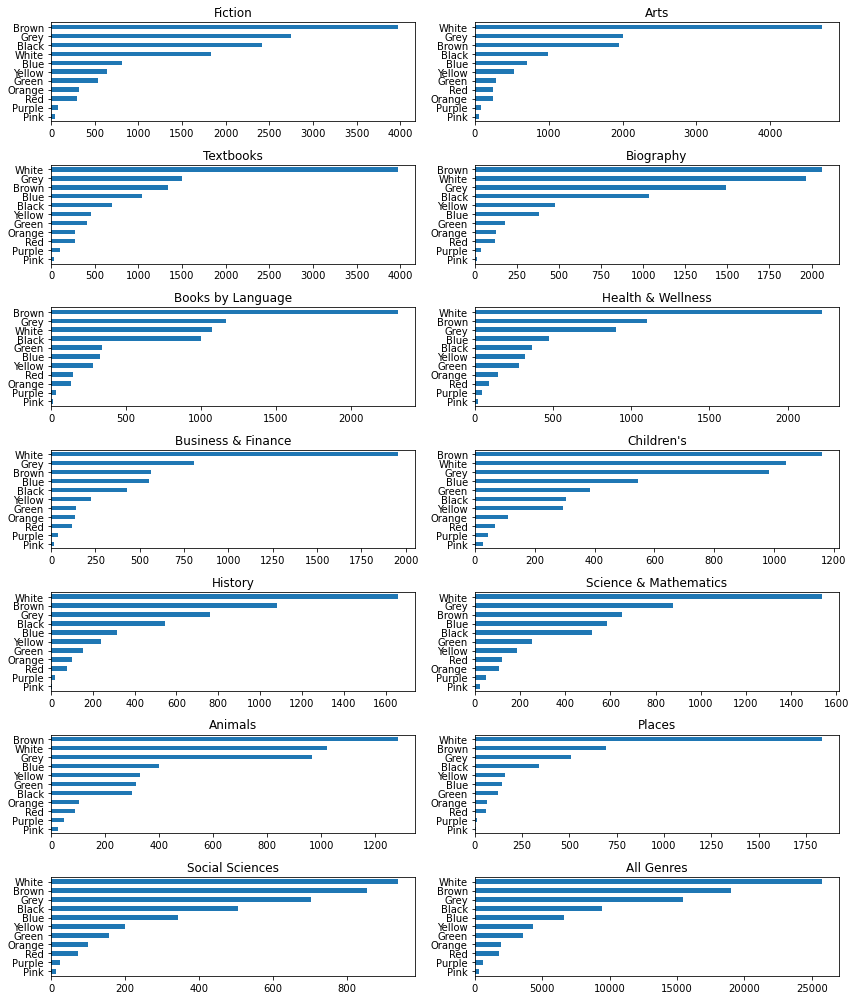

In [100]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12, 14))

for n, genre in enumerate(data.genre.value_counts().index):
    plt.sca(ax[n//2][n % 2])
    data.loc[data.genre == genre, 'color'].value_counts().plot(kind='barh')
    plt.gca().set_title(f'{genre}')
    plt.gca().invert_yaxis()

plt.sca(ax[6][1])
data['color'].value_counts().plot(kind='barh')
plt.gca().set_title('All Genres')
plt.gca().invert_yaxis()
    
fig.tight_layout()

Question 3: How does the distribution differ, if at all, by year of first publication?

In [101]:
data.head()

,title,first_published,authors,languages_available,subgenre,genre,color
0,The Stones of Venice,1851.0,['John Ruskin'],2.0,Architecture,Arts,Black
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],7.0,Architecture,Arts,Grey
2,The Alhambra,1800.0,['Washington Irving'],5.0,Architecture,Arts,Yellow
3,Coriolanus,1734.0,['William Shakespeare'],14.0,Architecture,Arts,Brown
4,A Child's History of England,1800.0,['Charles Dickens'],2.0,Architecture,Arts,Brown


In [102]:
data.first_published.describe()

count    88601.000000
mean      1960.696380
std         96.050639
min          1.000000
25%       1952.000000
50%       1989.000000
75%       2005.000000
max       2079.000000
Name: first_published, dtype: float64

In [103]:
data.loc[data.first_published==1]

,title,first_published,authors,languages_available,subgenre,genre,color
16771,Puck of Pook's Hill,1.0,"['Rudyard Kipling', 'Harold Robert Millar']",3.0,Fantasy,Fiction,Grey
17756,Puck of Pook's Hill,1.0,"['Rudyard Kipling', 'Harold Robert Millar']",3.0,Historical Fiction,Fiction,Grey
17774,Sketches by Boz,1.0,['Charles Dickens'],4.0,Historical Fiction,Fiction,Brown
17802,The Merry Adventures of Robin Hood of Great Re...,1.0,['Howard Pyle'],6.0,Historical Fiction,Fiction,Brown
17881,David Copperfield,1.0,['Charles Dickens'],19.0,Historical Fiction,Fiction,Black
18155,The Man in the Iron Mask,1.0,"['Alexandre Dumas', 'Ken Battefield', 'Simon V...",1.0,Historical Fiction,Fiction,Brown
19684,Martin Chuzzlewit,1.0,['Charles Dickens'],6.0,Humor,Fiction,Black
20645,The Merry Adventures of Robin Hood of Great Re...,1.0,['Howard Pyle'],6.0,Literature,Fiction,Brown
20663,Martin Chuzzlewit,1.0,['Charles Dickens'],6.0,Literature,Fiction,Black
20709,Sketches by Boz,1.0,['Charles Dickens'],4.0,Literature,Fiction,Brown


In [111]:
data.loc[data.first_published > 2023]

,title,first_published,authors,languages_available,subgenre,genre,color
43691,Good Night Einstein,2079.0,"['Adam Gamble', 'Mark Jasper', 'Cooper Kelley']",1.0,Bedtime Books,Children's,White


In [112]:
data.first_published.replace({1: None, 2079: None}, inplace=True)

In [117]:
data.first_published.astype(float).describe()

count    88553.000000
mean      1961.735164
std         84.800630
min        171.000000
25%       1952.000000
50%       1989.000000
75%       2005.000000
max       2023.000000
Name: first_published, dtype: float64

In [118]:
data.loc[data.first_published==171]

,title,first_published,authors,languages_available,subgenre,genre,color
17846,A Tale of Two Cities,171.0,['Charles Dickens'],16.0,Historical Fiction,Fiction,Black
21064,A Tale of Two Cities,171.0,['Charles Dickens'],16.0,Literature,Fiction,Black
40411,A Tale of Two Cities,171.0,['Charles Dickens'],16.0,Kids Books,Children's,Black
82403,Paris et Londres en 1793,171.0,['Charles Dickens'],16.0,French,Books by Language,Black
83322,Cuento de dos ciudades,171.0,['Charles Dickens'],16.0,Spanish,Books by Language,Black
86142,Una storia tra due città,171.0,['Charles Dickens'],16.0,Italian,Books by Language,Black
87044,A Tale of Two Cities: 双城记,171.0,['Charles Dickens'],16.0,Chinese,Books by Language,Black
87931,Nito monogatari,171.0,['Charles Dickens'],16.0,Japanese,Books by Language,Black


In [119]:
data.loc[data.first_published==171, 'first_published'] = 1859

In [121]:
data.first_published.astype(float).describe()

count    88553.000000
mean      1961.887660
std         83.080522
min        172.000000
25%       1952.000000
50%       1989.000000
75%       2005.000000
max       2023.000000
Name: first_published, dtype: float64

In [122]:
data.loc[data.first_published==172]

,title,first_published,authors,languages_available,subgenre,genre,color
16828,A Christmas Carol,172.0,['Charles Dickens'],19.0,Fantasy,Fiction,Black
17888,A Christmas Carol,172.0,['Charles Dickens'],19.0,Historical Fiction,Fiction,Black
18688,A Christmas Carol,172.0,['Charles Dickens'],19.0,Horror,Fiction,Black
19704,A Christmas Carol,172.0,['Charles Dickens'],19.0,Humor,Fiction,Black
20954,A Christmas Carol,172.0,['Charles Dickens'],19.0,Literature,Fiction,Black
24621,A Christmas Carol,172.0,['Charles Dickens'],19.0,Poetry,Fiction,Black
27493,A Christmas Carol,172.0,['Charles Dickens'],19.0,Short Stories,Fiction,Black
28465,A Christmas Carol,172.0,['Charles Dickens'],19.0,Thriller,Fiction,Black
40379,A Christmas Carol,172.0,['Charles Dickens'],19.0,Kids Books,Children's,Black
49252,A Christmas Carol,172.0,['Charles Dickens'],19.0,Social Life and Customs,History,Black


In [123]:
data.loc[data.first_published==172, 'first_published'] = 1843

In [124]:
data.first_published.astype(float).describe()

count    88553.000000
mean      1962.227321
std         79.081692
min       1000.000000
25%       1952.000000
50%       1989.000000
75%       2005.000000
max       2023.000000
Name: first_published, dtype: float64

In [133]:
data.loc[data.first_published>1201, 'first_published'].astype(float).describe()

count    88481.000000
mean      1962.927069
std         75.179613
min       1235.000000
25%       1952.000000
50%       1989.000000
75%       2005.000000
max       2023.000000
Name: first_published, dtype: float64

I think that [this](https://openlibrary.org/works/OL349325W/The_Roman_Breviary?edition=key%3A/books/OL24612693M) is the book referenced as "The Roman Breviary" below which was NOT published in 1200, nor does openlibrary.org claim that it was. Where did my scraping go wrong?

In [135]:
data.loc[data.first_published==1200]

,title,first_published,authors,languages_available,subgenre,genre,color
7910,The Roman Breviary,1200.0,"['Catholic Church', 'John Patrick Crichton-Stu...",7.0,Music,Arts,Brown
21199,Bible,1200.0,['Bible'],35.0,Literature,Fiction,Brown
34308,Bible,1200.0,['Bible'],35.0,Programming,Science & Mathematics,Brown
40464,Bible,1200.0,['Bible'],35.0,Kids Books,Children's,Brown
50177,The Roman Breviary,1200.0,"['Catholic Church', 'John Patrick Crichton-Stu...",7.0,Cooking,Health & Wellness,Brown
53212,Bible,1200.0,['Bible'],35.0,Exercise,Health & Wellness,Brown
57150,Bible,1200.0,['Bible'],35.0,History,Biography,Brown
60084,Bible,1200.0,['Bible'],35.0,Women,Biography,Brown
65029,Bible,1200.0,['Bible'],35.0,Religion,Social Sciences,Brown
68946,Bible,1200.0,['Bible'],35.0,India,Places,Brown


In [142]:
data.loc[data.first_published >= 1473, 'first_published'].astype(float).describe()

count    88417.000000
mean      1963.297737
std         73.923341
min       1475.000000
25%       1952.000000
50%       1989.000000
75%       2005.000000
max       2023.000000
Name: first_published, dtype: float64

In [152]:
data.loc[data.first_published >= 1473].groupby(['color'])['first_published'].min()

color
Black     1475.0
Blue      1491.0
Brown     1478.0
Green     1475.0
Grey      1475.0
Orange    1479.0
Pink      1706.0
Purple    1799.0
Red       1482.0
White     1475.0
Yellow    1476.0
Name: first_published, dtype: float64

In [145]:
import seaborn as sns

In [144]:
fig, ax = plt.subplots()

sns.plot(data=data.loc[data.first_published >= 1473], x=first_published, y=

,title,first_published,authors,languages_available,subgenre,genre,color
0,The Stones of Venice,1851.0,['John Ruskin'],2.0,Architecture,Arts,Black
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],7.0,Architecture,Arts,Grey
2,The Alhambra,1800.0,['Washington Irving'],5.0,Architecture,Arts,Yellow
3,Coriolanus,1734.0,['William Shakespeare'],14.0,Architecture,Arts,Brown
4,A Child's History of England,1800.0,['Charles Dickens'],2.0,Architecture,Arts,Brown
...,...,...,...,...,...,...,...
88830,Tokugawa Ieyasu: Shishi no za no maki,1953.0,['Sōhachi Yamaoka'],1.0,Japanese,Books by Language,Brown
88831,Genroku haishoshu (Tenri Toshokan Wataya bunko...,1994.0,"['Zenʼemon Kōnoike', 'Tenri Toshokan.']",1.0,Japanese,Books by Language,Grey
88832,Soveto Roshia shi,1955.0,['Georg von Rauch'],3.0,Japanese,Books by Language,Brown
88833,Vasarely: shikisai uchū no hensōkoku,1959.0,['Victor Vasarely'],4.0,Japanese,Books by Language,White


---

---

Quick test: after determining the dominant color of the cover of the first 5000 books in the library (when it was possible, i.e. the image was not null), check that the distribution of colors is not completely unexpected:

Here are the books from the first 5000 that had non-null image covers:

In [20]:
rgb_test = pd.read_csv('rgb_test.csv', index_col=0)

rgb_test.head()

,red,green,blue
0,9,12,19
1,55,52,44
2,250,243,184
3,27,5,5
4,66,42,27


Make predictions:

In [29]:
rgb_test['prediction'] = [np.argmax(example) for example in clf.predict(rgb_test)]

154/154 [==============================] - 0s 503us/step


Load the dictionary mapping the enumerated classes to their descriptive names. (Note that the numbers used as keys in this dictionary are stored as strings.)

In [28]:
with open('model_class_mapping.json', 'r') as f:
    label_mapping = json.load(f)

In [34]:
rgb_test['prediction'] = rgb_test.prediction.astype(str).replace(label_mapping).map(lambda x: x.split('_')[1])

In [36]:
rgb_test.prediction.value_counts()

White     1980
Grey       879
Brown      794
Black      372
Blue       282
Yellow     222
Green      125
Orange     106
Red        105
Purple      31
Pink        24
Name: prediction, dtype: int64